# Lab 11

### Question 1

Apply k nearest neighbour algorithm to predict breast cancer types based on the dataset <i>wisc_bc_data.csv</i>. Set the seed of the random number generator to be 1048. Carry out the necessary data transformation. Use the first 469 rows in the dataset as the training set and the remaining rows as testing set. Try different values of $k$ and report the error rates of the prediction by testing set.

### Answer:

Load the library for k nearest neighhour algorithm

In [1]:
library(class)

Set seed so that the result is repeatable

In [2]:
set.seed(1048) 

Read dataset from CSV file. <i>Breast Cancer Wisconsin Diagnostic</i> dataset from the 
UCI Machine Learning Repository, which is available at http://archive.ics.uci.edu/ml

In [3]:
wbcd <- read.csv("wisc_bc_data.csv", stringsAsFactors = FALSE)

Randomly reorder the dataset

In [4]:
wbcd <- wbcd[sample(nrow(wbcd)), ]

Extract the feature variables: \#3 to \#32

In [5]:
wbcd_feature <- wbcd[ ,3:32]

Extract the diagnosis variable: \#2

In [6]:
wbcd_diagnosis <- wbcd[ ,2] 

The diagnosis is coded as <b>M</b> to indicate malignant or <b>B</b> to indicate benign.

In [7]:
table(wbcd_diagnosis)

wbcd_diagnosis
  B   M 
357 212 

Take a closer look at the first three features

In [8]:
summary(wbcd_feature[,1:3])

  radius_mean      texture_mean   perimeter_mean  
 Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Median :13.370   Median :18.84   Median : 86.24  
 Mean   :14.127   Mean   :19.29   Mean   : 91.97  
 3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
 Max.   :28.110   Max.   :39.28   Max.   :188.50  

Normalise the values of features

In [9]:
wbcd_feature_z <- as.data.frame(scale(wbcd_feature))

Check again

In [10]:
summary(wbcd_feature_z[,1:3])

  radius_mean       texture_mean     perimeter_mean   
 Min.   :-2.0279   Min.   :-2.2273   Min.   :-1.9828  
 1st Qu.:-0.6888   1st Qu.:-0.7253   1st Qu.:-0.6913  
 Median :-0.2149   Median :-0.1045   Median :-0.2358  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4690   3rd Qu.: 0.5837   3rd Qu.: 0.4992  
 Max.   : 3.9678   Max.   : 4.6478   Max.   : 3.9726  

Set up the inputs of training data

In [11]:
train_input <- wbcd_feature_z[1:469, ]

Set up the outputs of training data

In [12]:
train_output <- wbcd_diagnosis[1:469]

Set up the inputs of testing data

In [13]:
test_input <- wbcd_feature_z[470:569, ]

Set up the outputs of testing data

In [14]:
test_output <- wbcd_diagnosis[470:569]

Train knn with k = 21 (arbitrarily selected)

In [15]:
test_pred <- knn(train = train_input, test = test_input,
                      cl = train_output, k=21)

Evaluate the performance

In [16]:
table(test_output, test_pred)

           test_pred
test_output  B  M
          B 56  0
          M  4 40

Try different values of k

In [17]:
for (i in c(1,5,11,15,21,30)) {
  print(i)
  test_pred <- knn(train = train_input, test = test_input,
                   cl = train_output, k=i)
  
  print(table(test_output, test_pred))
}

[1] 1
           test_pred
test_output  B  M
          B 54  2
          M  3 41
[1] 5
           test_pred
test_output  B  M
          B 56  0
          M  4 40
[1] 11
           test_pred
test_output  B  M
          B 56  0
          M  4 40
[1] 15
           test_pred
test_output  B  M
          B 56  0
          M  4 40
[1] 21
           test_pred
test_output  B  M
          B 56  0
          M  4 40
[1] 30
           test_pred
test_output  B  M
          B 56  0
          M  5 39


### Question 2

Train a feedforward neural network with one hidden layer for the prediction of concrete strength based on the dataset <i>concrete.csv</i>. Set the seed of the random number generator to be 1048. Carry out the necessary data transformation. Use the first 773 rows in the dataset as the training set and the remaining rows as testing set. Try different number of neurons in the hidden layer. Report the correlations between the predicted values and the values in testing set. Also report the root mean square errors (RMSE).

### Answer:

Load the library for Neural Networks

In [18]:
library(neuralnet)

Set seed so that the result is repeatable

In [19]:
set.seed(1024)

Read dataset and randomise the row order

In [20]:
concrete <- read.csv("concrete.csv")
concrete <- concrete[sample(nrow(concrete)), ]

Show the structure and the summary of the <b>strength</b>

In [21]:
str(concrete)
summary(concrete$strength)

'data.frame':	1030 obs. of  9 variables:
 $ cement      : num  277 516 174 250 232 ...
 $ slag        : num  0 0 93.4 0 0 ...
 $ ash         : num  97.4 0 159.9 95.7 121.6 ...
 $ water       : num  161 162 172 192 174 ...
 $ superplastic: num  11.8 8.3 9.7 5.3 6.7 3.9 11.6 0 0 7.8 ...
 $ coarseagg   : num  974 801 1007 949 1056 ...
 $ fineagg     : num  876 802 747 857 778 ...
 $ age         : int  100 28 28 14 28 3 7 3 7 28 ...
 $ strength    : num  55.6 41.4 37.8 24.7 33.7 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.33   23.71   34.45   35.82   46.13   82.60 

Standardise the scales of the variables

In [22]:
concrete_z <- as.data.frame(scale(concrete))

Show the summary of the standised <b>strength</b>

In [23]:
summary(concrete_z$strength)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.00458 -0.72478 -0.08218  0.00000  0.61757  2.80036 

Define training set and testing set

In [24]:
train_set <- concrete_z[1:773, ]
test_input <- concrete_z[774:1030, 1:8]
test_output <- concrete_z[774:1030, 9]

Train the multilayer feedforward network with a single hidden node

In [25]:
concrete_model <- neuralnet(strength ~ cement + slag + ash + water 
                            + superplastic + coarseagg + fineagg + age,
                            data = train_set, hidden = 1, stepmax=1e7)

Plot the structure of network

In [26]:
print(concrete_model$weight)

[[1]]
[[1]][[1]]
             [,1]
 [1,] -1.15765106
 [2,] -1.04310647
 [3,] -0.61996147
 [4,] -0.28046362
 [5,]  0.27338561
 [6,] -0.25237164
 [7,] -0.04548266
 [8,] -0.04756560
 [9,] -2.27062936

[[1]][[2]]
          [,1]
[1,]  1.174773
[2,] -3.177433




Test the network

In [27]:
predicted_strength <- predict(concrete_model, test_input)

Find the correlation between predicted values and actual values

0.8405461


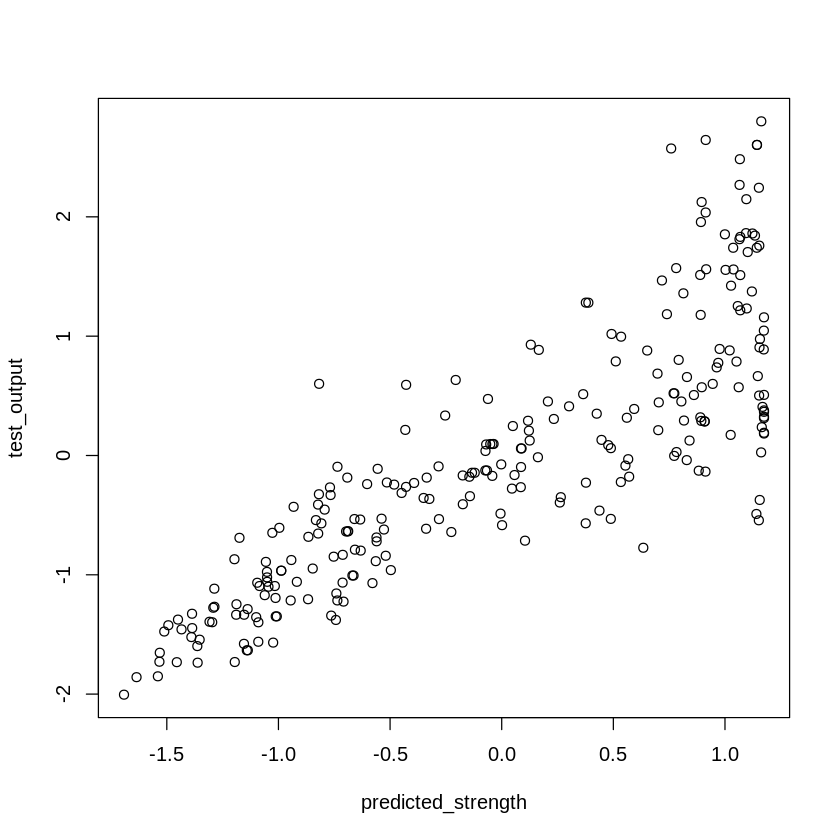

In [28]:
cor(predicted_strength, test_output)
plot(predicted_strength, test_output)

Find the root mean squared error

In [29]:
library(Metrics)
rmse(predicted_strength, test_output)

[1] 0.5726085

Train the multilayer feedforward network with five hidden nodes

In [30]:
concrete_model2 <- neuralnet(strength ~ cement + slag + ash + water 
                             + superplastic + coarseagg + fineagg + age,
                             data = train_set, hidden = 5, stepmax=1e7)

Print the weights of network

In [31]:
print(concrete_model2$weight)

[[1]]
[[1]][[1]]
            [,1]         [,2]        [,3]       [,4]       [,5]
 [1,] -2.4262206  1.102840461 -6.96372782  81.253291 103.802760
 [2,]  7.9814673  0.598858482  0.34566126  22.281190  23.059025
 [3,]  6.8989789  0.458746344  0.39086752   3.831447   4.851057
 [4,]  6.3709554  0.077379138  0.33334452 -21.339340  80.561380
 [5,]  1.3567863  0.103413897  0.13490362 111.812892 -76.279762
 [6,]  3.5870677 -0.122306888 -0.02385658  57.063120  52.914721
 [7,]  4.2785646  0.125650819  0.20713461  26.488834 -14.583119
 [8,]  5.1355559  0.099971585  0.22126467  30.429686 -13.604506
 [9,] -0.9711625  0.007642488 -3.05433610 -53.231009   1.913533

[[1]][[2]]
             [,1]
[1,]   -4.4752348
[2,]    0.8012037
[3,]    6.5510863
[4,] -219.9503474
[5,]   -0.4940358
[6,]    0.6942104




Test the network 

In [32]:
predicted_strength2 <- predict(concrete_model2, test_input)

The correlation between predicted values and actual values

0.9325245


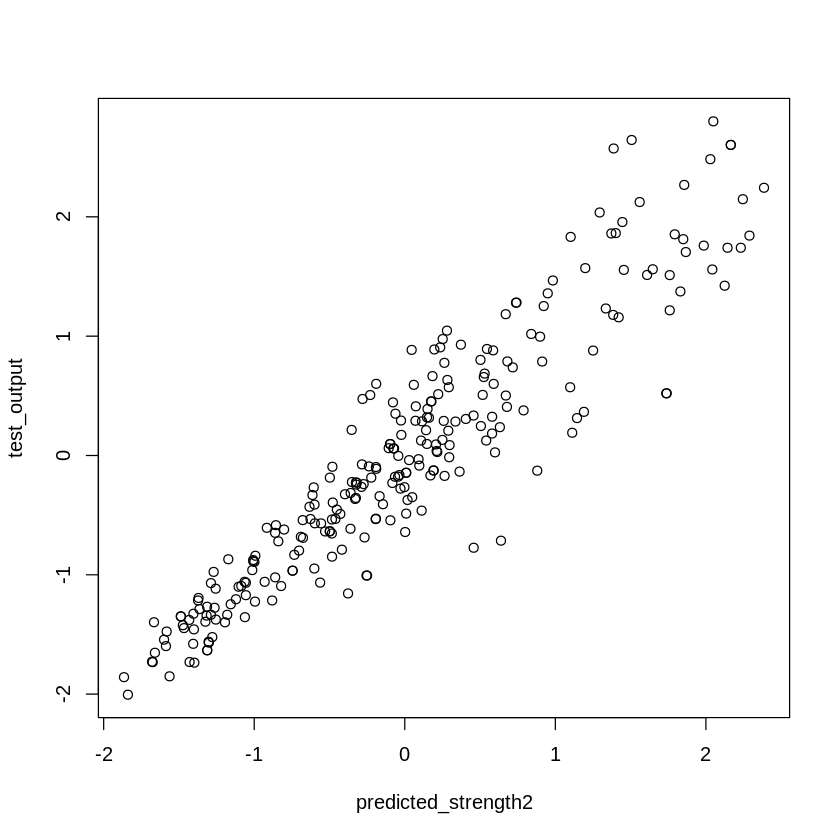

In [33]:
cor(predicted_strength2, test_output)
plot(predicted_strength2, test_output)

Find the root mean squared error

In [34]:
rmse(predicted_strength2, test_output)

[1] 0.3816046